# Day047：超參數調整
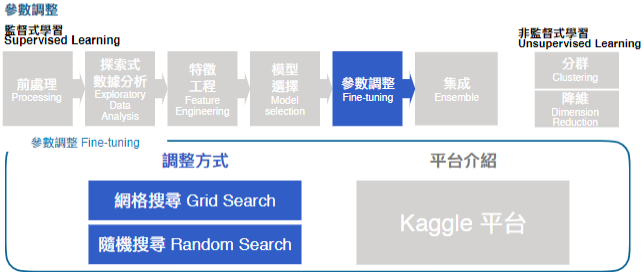

## 知識點目標
1. 了解 超參數，如何調整?
2. 調整 超參數 的步驟
3. 常用的調整 超參數 方法

機器學習模型中的超參數
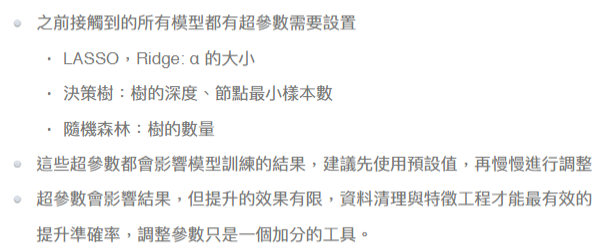

超參數調整方法
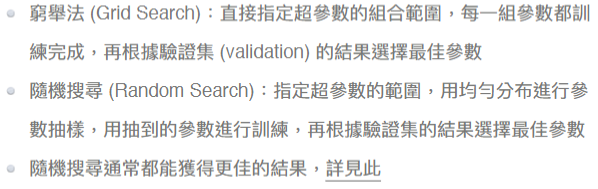

[Smarter Parameter Sweeps (or Why Grid Search Is Plain Stupid)](https://medium.com/rants-on-machine-learning/smarter-parameter-sweeps-or-why-grid-search-is-plain-stupid-c17d97a0e881)

paper:[Random Search for Hyper-Parameter Optimization
](http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf)

機器學習模型訓練步驟
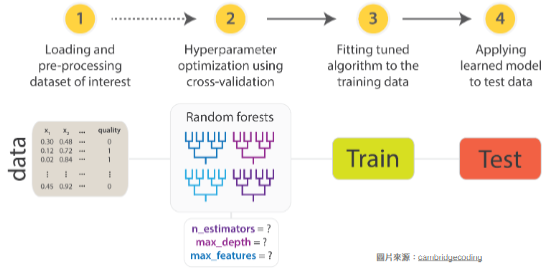

正確的超參數調整步驟
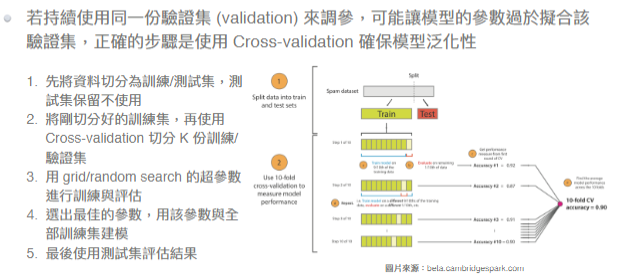

## 常見問題
Q：超參數調整對最終結果影響很大嗎？
A：超參數調整通常都是機器學習專案的最後步驟，因為這對於最終的結果影響不會太多，多半是近一步提升 3-5 % 的準確率，但是好的"特徵工程"、"資料清理"是能夠一口氣提升 10-20 ％的準確率！因此建議專案一開始時，不需要花太多時間進行超參數的調整。

對結果影響： 特徵工程、資料清理 > 超參數調整(通常是ML的最後步驟)

## 延伸閱讀
1. [劍橋實驗室教你如何調參數-英文](https://cambridgecoding.wordpress.com/2016/04/03/scanning-hyperspace-how-to-tune-machine-learning-models/)
2. [教你使用Python調整隨機森林參數-英文](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

## 範例

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
# 讀取手寫辨識資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=42)

# 建立模型
clf = GradientBoostingRegressor(random_state=7)

In [5]:
# 先看看使用預設參數得到的結果，約為 8.379 的 MSE
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

8.913775994322064


In [6]:
# 設定要訓練的超參數組合
n_estimators = [100, 200, 300]
max_depth = [1, 3, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(clf, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 預設會跑 3-fold cross-validadtion，總共 9 種參數組合，總共要 train 27 次模型

C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.4s finished
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: -13.118704 using {'max_depth': 3, 'n_estimators': 200}


In [8]:
grid_result.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [9]:
# 使用最佳參數重新建立模型
clf_bestparam = GradientBoostingRegressor(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

In [10]:
# 調整參數後約可降至 8.30 的 MSE
print(metrics.mean_squared_error(y_test, y_pred))

8.912670002117835


## 作業
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

# Day048：參數調整 Kaggle - Home of Data Science
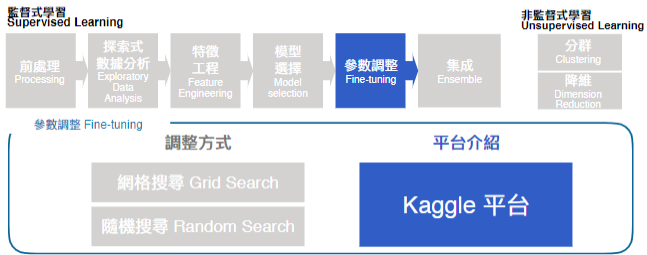

Kaggle
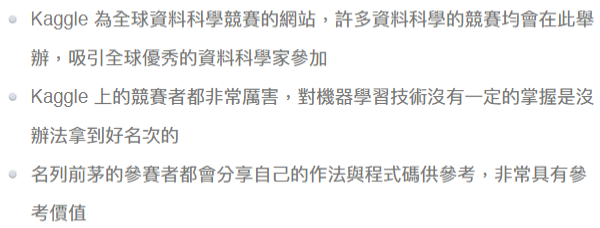

排行榜
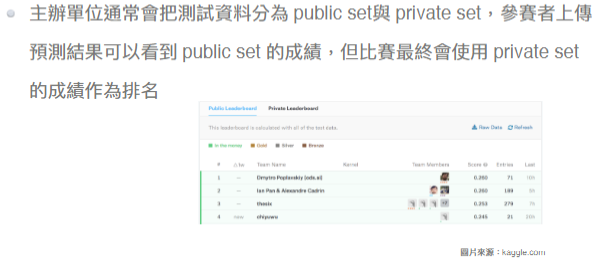

Kernels 與 Discussion
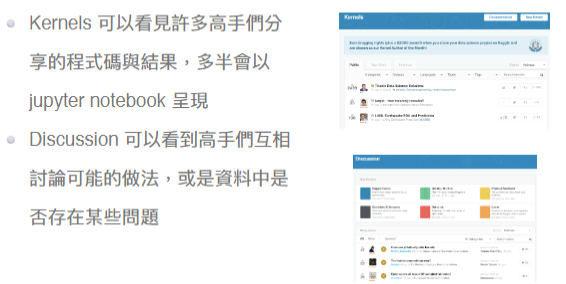

## 重要知識點
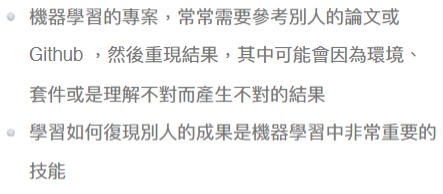

## 作業
本日作業：

透過 Kaggle 的實戰練習，把資料下載下來，自己做訓練集/測試集的切分，送進模型訓練，評估結果，再把測試集的答案上傳到 Kaggle 得到最終成績。



請完成 scikit-learn-practice 比賽(點擊連結可至競賽頁面)，讓大家熟悉 Scikit-learn 的比賽



總共有一千筆訓練資料、40個 features，二元分類問題，練習 features scaling、建模、調參數等步驟
每天最多上傳 10 次結果
請在 private / public leaderboard 上取得 0.7 以上的準確率
可多參考別人的 Kernel，學習別人的寫法與思路，完成自己的 Kaggle 競賽
https://www.kaggle.com/c/data-science-london-scikit-learn

# Day049 : 集成－混合泛化(Blending)
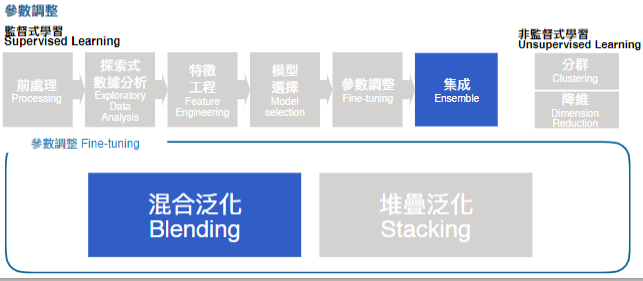

## 知識點目標
1. 資料工程中的集成，有哪些常見的內容?
2. 混合泛化為什麼能提升預測力，使用上要注意什麼問題?

什麼是集成
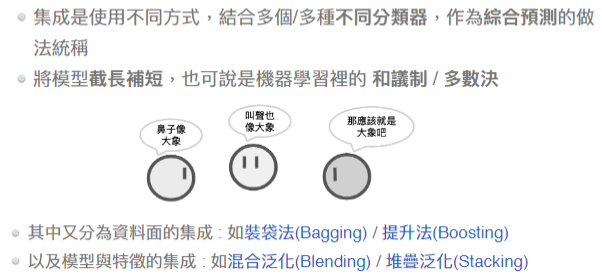

資料面集成 : 裝袋法 ( Bagging )
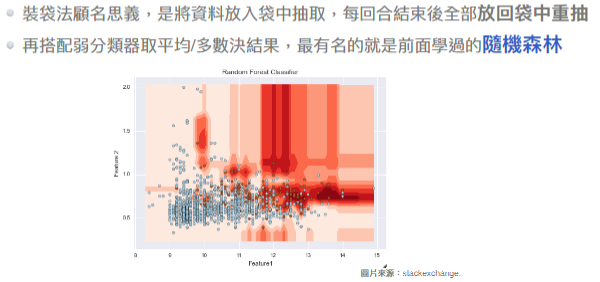

資料⾯面集成 : 提升法 ( Boosting )
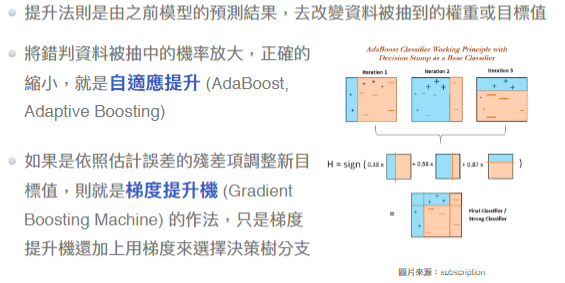

資料集成 v.s. 模型與特徵集成
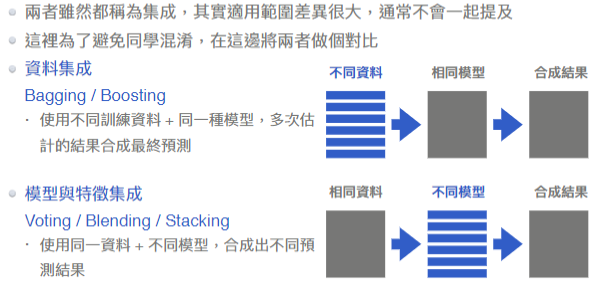

混合泛化 ( Blending ) ( 1 / 3 )
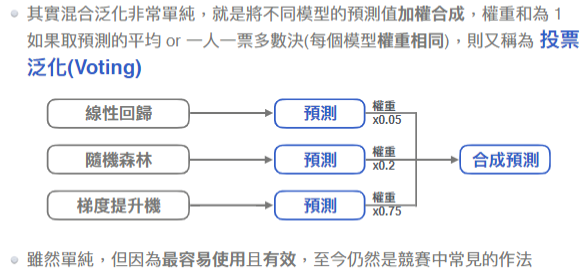

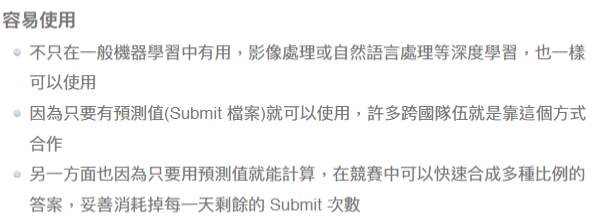

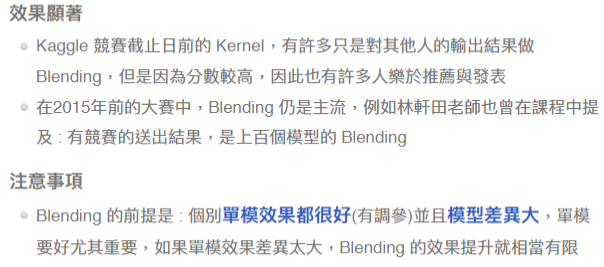

## 重點知識學習
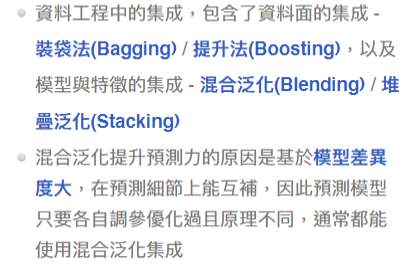

## 延伸閱讀
[機器學習技法 Lecture 7: Blending and Bagging](https://www.youtube.com/watch?v=mjUKsp0MvMI&list=PLXVfgk9fNX2IQOYPmqjqWsNUFl2kpk1U2&index=27&t=0s)

當我們在網路上自己搜尋 Blending 時，往往搜尋到的都是林軒田老師的課程筆記，因此我們推薦同學如果對於 Blending 或Bagging 的理論想要一探更更完整內容的話，不妨來這邊尋找研讀的資料，相信絕對不會讓您失望 (如果太困難，也可以參考網路上眾多的閱讀筆記)

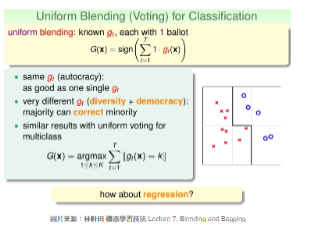

[Superblend_Kaggle 競賽網站-Kernel 範例](https://www.kaggle.com/tunguz/superblend)

這邊就是我們所謂競賽中的 Blending Kernel，只是決定一個權重，將兩個其他的 Kernel 合併成答案檔，就是這場競賽中的最高分 Kernel，我們並不是要鼓勵⼤大家也去這樣去賺分數，而是在告訴大家 : Blending 的簡單，以及 Blending 的具有威力。

## 範例
分數以網站評分結果為準, 請同學實際將提交檔(*.csv)上傳試試看
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit


以下用房價預測資料, 觀查混合泛化 (Blending) 的寫法與效果

觀察混合泛化的準確度, 是否比單一模型準確度為高
除了我們的權重, 同學也可以試著自行調整權重 (注意:權重和=1), 看看有什麼影響

In [1]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import copy, time
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train, df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [2]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [3]:
# 以下 In[3]~In[7] 只是摘錄房產預測中的一組特徵工程, 並以此組特徵工程跑參數, 若更換其他特徵工程, In[8]的參數需要重新跑
# 部分欄位缺值補 'None'
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'FireplaceQu', 'FireplaceQu', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
             'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'Functional', 'MSSubClass']
for col in none_cols:
    df[col] = df[col].fillna("None")
    
# 部分欄位缺值填補 0
zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
             'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for col in zero_cols:
    df[col] = df[col].fillna(0)

In [4]:
# 部分欄位缺值補眾數
mode_cols = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
# 'LotFrontage' 有空缺時, 以同一區 (Neighborhood) 的 LotFrontage 中位數填補 (可以視為填補一種群聚編碼 )
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Utilities 參考資訊很少, 所以直接捨棄
df = df.drop(['Utilities'], axis=1)

In [5]:
# 做完各種補缺值, 確認一下有沒有遺漏
na_check(df)

,Missing Ratio


In [6]:
# 四個數值欄位, 因為相異值有限, 轉成文字
label_cols = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
for col in mode_cols:
    df[col] = df[col].astype(str)
    
# 相異值不太具有代表性的, 做標籤編碼
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))
    
# 由地下室面積 + 1樓面積 + 2樓面積, 計算總坪數特徵   
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']    
    
# 看看目前特徵工程的結果
print('Shape df: {}'.format(df.shape))
df.head()

Shape df: (2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,5,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,1,2,WD,Normal,2566.0
1,0,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,3,4,None,0,4,1,WD,Normal,2524.0
2,5,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,3,4,None,0,8,2,WD,Normal,2706.0
3,6,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,3,4,None,0,1,0,WD,Abnorml,2473.0
4,5,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,3,4,None,0,11,2,WD,Normal,3343.0


In [7]:
# 把剩下少數重要的類別型欄位, 做獨熱編碼 (已變成數字的欄位, 會自動跳過)
df = pd.get_dummies(df)
print(df.shape)

(2919, 221)


In [8]:
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 使用三種模型 : 線性迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
linear = LinearRegression(normalize=False, fit_intercept=True, copy_X=True)
gdbt = GradientBoostingRegressor(tol=0.1, subsample=0.37, n_estimators=200, max_features=20, 
                                 max_depth=6, learning_rate=0.03)
rf = RandomForestRegressor(n_estimators=300, min_samples_split=9, min_samples_leaf=10, 
                           max_features='sqrt', max_depth=8, bootstrap=False)

In [9]:
# 線性迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
linear.fit(train_X, train_Y)
linear_pred = linear.predict(test_X)
sub = pd.DataFrame({'Id': ids, 'SalePrice': np.expm1(linear_pred)})
sub.to_csv('house_linear.csv', index=False) 

In [10]:
# 梯度提升機預測檔 
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict(test_X)
sub = pd.DataFrame({'Id': ids, 'SalePrice': np.expm1(gdbt_pred)})
sub.to_csv('house_gdbt.csv', index=False)

In [11]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict(test_X)
sub = pd.DataFrame({'Id': ids, 'SalePrice': np.expm1(rf_pred)})
sub.to_csv('house_rf.csv', index=False)

In [12]:
# 混合泛化預測檔 (依 Kaggle 傳回分數調整比重, 越準確者比重越高, 依資料性質有所不同)
blending_pred = linear_pred*0.30 + gdbt_pred*0.67 + rf_pred*0.03
sub = pd.DataFrame({'Id': ids, 'SalePrice': np.expm1(blending_pred)})
sub.to_csv('house_blending.csv', index=False)

## 作業
分數以網站評分結果為準, 請同學實際將提交檔(*.csv)上傳試試看
https://www.kaggle.com/c/titanic/submit

試著模仿範例寫法, 在鐵達尼生存預測中, 觀察觀查混合泛化 (Blending) 的寫法與效果

觀察混合泛化的準確度 (In[14]), 是否比單一模型準確度為高 (In[11~13])
除了我們的權重, 同學也可以試著自行調整權重 (注意:權重和=1), 看看有什麼影響
Hint : 除了權重, 分類預測的調整, 還可以調整什麼地方?

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


In [3]:
# 以下 In[3]~In[10] 只是鐵達尼預測中的一組特徵工程, 並以此組特徵工程跑參數, 若更換其他特徵工程, In[10]的參數需要重新跑
# Sex : 直接轉男 0 女 1
df["Sex"] = df["Sex"].map({"male": 0, "female":1})
# Fare : 用 log 去偏態, 0 則直接取 0
df["Fare"] = df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
# Age : 缺值用中位數補
df["Age"] = df["Age"].fillna(df['Age'].median())

In [4]:
# Title 的 特徵工程 : 將各種頭銜按照類型分類, 最後取 One Hot
df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(df_title)
df["Title"] = df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df["Title"] = df["Title"].astype(int)
df = pd.get_dummies(df, columns = ["Title"])

In [5]:
# 新建:家庭大小 (Fsize)特徵, 並依照大小分別建獨立欄位
df["Fsize"] = df["SibSp"] + df["Parch"] + 1
df['Single'] = df['Fsize'].map(lambda s: 1 if s == 1 else 0)
df['SmallF'] = df['Fsize'].map(lambda s: 1 if  s == 2  else 0)
df['MedF'] = df['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df['LargeF'] = df['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [6]:
# Ticket : 如果不只是數字-取第一個空白之前的字串(去除'.'與'/'), 如果只是數字-設為'X', 最後再取 One Hot
Ticket = []
for i in list(df.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append("X")        
df["Ticket"] = Ticket
df = pd.get_dummies(df, columns = ["Ticket"], prefix="T")

In [7]:
# Cabib 依照第一碼分類, 再取 One Hot
df["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in df['Cabin'] ])
df = pd.get_dummies(df, columns = ["Cabin"], prefix="Cabin")

In [8]:
# Embarked, Pclass 取 One Hot
df = pd.get_dummies(df, columns = ["Embarked"], prefix="Em")
df["Pclass"] = df["Pclass"].astype("category")
df = pd.get_dummies(df, columns = ["Pclass"], prefix="Pc")

# 捨棄 Name 欄位
df.drop(labels = ["Name"], axis = 1, inplace = True)

In [9]:
# 確認缺值 與 目前的資料表內容
na_check(df)
df.head()

,Missing Ratio


,Sex,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Em_C,Em_Q,Em_S,Pc_1,Pc_2,Pc_3
0,0,22.0,1,0,1.981001,0,0,1,0,2,...,0,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,4.266662,0,1,0,0,2,...,0,0,0,0,1,0,0,1,0,0
2,1,26.0,0,0,2.070022,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,3.972177,0,1,0,0,2,...,0,0,0,0,0,0,1,1,0,0
4,0,35.0,0,0,2.085672,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [10]:
# 將資料最大最小化
df = MinMaxScaler().fit_transform(df)

# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=20,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)

In [11]:
# 線性迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'PassengerId': ids, 'Survived': lr_pred})
sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('titanic_lr.csv', index=False) 

In [12]:
# 梯度提升機預測檔 
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'PassengerId': ids, 'Survived': gdbt_pred})
sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('titanic_gdbt.csv', index=False)

In [13]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'PassengerId': ids, 'Survived': rf_pred})
sub['Survived'] = sub['Survived'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('titanic_rf.csv', index=False)

雖然同樣是混合泛化，分類預測其實與回歸預測有相當多的差異性， 因為鐵達尼預測的結果是 '生存/死亡'，輸出不是 0 就是 1
因此要用權重混合時，需要以以機率的形式混合，因此我們在作業前幾格當中，先幫各位同學把預測值寫成了機率的形式
(請同學把下列程式完成，並將結果提交到 Kaggle 網站看看結果)

但是光是這樣，分類問題的混合泛化就能比單模預測還要好嗎?
已經快要期中考了，這裡請同學挑戰看看，還有沒有什麼方法可以改進混合泛化的結果?

In [14]:
# 混合泛化預測檔 
"""
Your Code Here
"""
blending_pred = lr_pred*  + gdbt_pred* + rf_pred*
sub = pd.DataFrame({'PassengerId': ids, 'Survived': blending_pred})
sub['Survived'] =  
sub.to_csv('titanic_blending.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-14-1eae7572fc4e>, line 5)